In [289]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [290]:
url = r"D:\Supervised Machine Learning lab (SMLL)\6\Practice dataset 2 KNNClassifier drug_classification.csv"
df = pd.read_csv(url)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug_Type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [292]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [293]:
df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [294]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [295]:
# Encode categorical columns
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug_Type'] = le.fit_transform(df['Drug_Type'])

# Display the updated dataframe
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_Type
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [296]:
X = df.drop('Drug_Type', axis=1)
y = df['Drug_Type']

In [297]:
x = pd.get_dummies(X, drop_first=True)

In [298]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [299]:
x

array([[-1.29159102, -1.040833  , -1.11016894, -0.97043679,  1.28652212],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.4151454 ],
       [ 0.16269866,  0.96076892,  0.10979693, -0.97043679, -0.82855818],
       [-0.988614  , -1.040833  ,  1.32976279, -0.97043679, -1.14996267],
       [ 1.0110343 , -1.040833  ,  0.10979693, -0.97043679,  0.27179427],
       [-1.35218642, -1.040833  ,  1.32976279, -0.97043679, -1.03769314],
       [ 0.28388946, -1.040833  ,  1.32976279, -0.97043679,  0.02643885],
       [-0.20087376,  0.96076892,  0.10979693, -0.97043679, -0.70046821],
       [ 0.9504389 ,  0.96076892,  1.32976279, -0.97043679, -0.12676951],
       [-0.07968296,  0.96076892,  0.10979693,  1.03046381,  0.45567206],
       [ 0.16269866, -1.040833  ,  0.10979693, -0.97043679, -0.59916196],
       [-0.62504158, -1.040833  , -1.11016894,  1.03046381,  0.43221897],
       [-0.07968296,  0.96076892,  0.10979693, -0.97043679, -0.09832049],
       [ 1.79877454, -1.040833  ,  0.1

In [300]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

In [301]:
params = {
    'n_neighbors':np.array(range(1, 50)),
    'weights' : ['uniform', 'distance'],
    'metric':['minkowski','manhattan','euclidean']
}

In [302]:
from sklearn.neighbors import KNeighborsClassifier
dia_reg = GridSearchCV(KNeighborsClassifier(), params, cv = 10)

In [303]:
dia_reg.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [304]:
dia_reg.best_score_

0.8928571428571429

In [305]:
dia_reg.best_params_

{'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}

In [306]:
regressor = KNeighborsClassifier(metric = 'manhattan', n_neighbors= 21, weights='distance')
regressor.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=21, weights='distance')

In [307]:
y_pred = regressor.predict(X_test)


In [308]:
from sklearn.metrics import accuracy_score
# Calculate and display accuracy score
print("Accuracy score : {:.4f}".format(accuracy_score(y_test, y_pred)))

Accuracy score : 0.9167


In [309]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[24  0  2  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 2  0  0  3  1]
 [ 0  0  0  0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       1.00      1.00      1.00         7
           2       0.60      1.00      0.75         3
           3       1.00      0.50      0.67         6
           4       0.95      1.00      0.97        18

    accuracy                           0.92        60
   macro avg       0.89      0.88      0.86        60
weighted avg       0.93      0.92      0.91        60


Accuracy Score:
0.9166666666666666


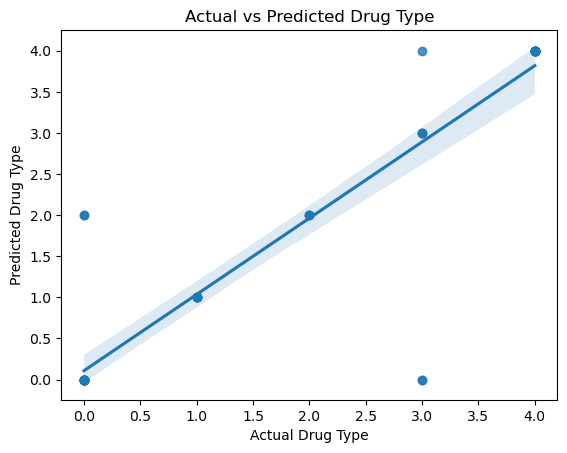

In [310]:
# Plot the regplot for the predictions
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Drug Type')
plt.ylabel('Predicted Drug Type')
plt.title('Actual vs Predicted Drug Type')
plt.show()

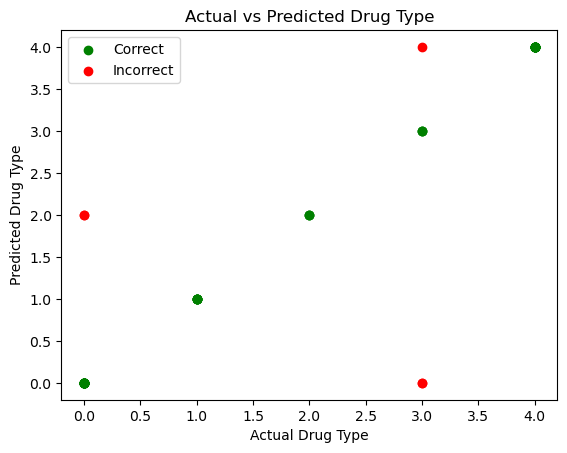

In [311]:
# Create a boolean array indicating correct predictions
correct = y_test == y_pred

# Plot the correct predictions in green
plt.scatter(y_test[correct], y_pred[correct], color='green', label='Correct')

# Plot the incorrect predictions in red
plt.scatter(y_test[~correct], y_pred[~correct], color='red', label='Incorrect')

# Add labels and title
plt.xlabel('Actual Drug Type')
plt.ylabel('Predicted Drug Type')
plt.title('Actual vs Predicted Drug Type')

# Add legend
plt.legend()

# Show plot
plt.show()